<h2>N-grams</h2>

Autor: Israel Ceballos <br>
Profesor: Jorge Castillo

El presente trabajo tiene por objetivo dar una introducción a los modelos probabilisticos presentes en el tercer capitulo del libro "Speech and Language Proccessing", con foco en la escritura de cada uno de estos modelos en Python, permitiendo asi al lector disponer de funciones de probabilidad capaces de precedir la ocurrencia de n-gramas.

<h3>Problema Inicial</h3>

$$P(transparente|el \hspace{0.1cm} agua \hspace{0.1cm}  es) = \frac{C(el\hspace{0.1cm} agua\hspace{0.1cm} es \hspace{0.1cm}transparente)}{C(el\hspace{0.1cm} agua\hspace{0.1cm} es)}$$

Definimos la probabilidad condicional de "transparente" luego de "el agua es" como el conteo (C) de los casos favorables dividio en los casos posibles.


Una forma de estimar esta probabilidad es viendo la historia del texto, de cuantas veces aparezca "el agua es" viene seguido de "transparente", este método es el más ajustado a la teoría, ya que usa conteo de frecuencias, eso sí,  no es el más conveniente, dado que el lenguaje es creativo y va cambiando con el tiempo, y no siempre podremos identificar literamente la frase requerida en un texto.

<h3>Notación sugerida</h3>

Definase la probabilidad de ocurrencia de n palabras seguidas $(w_{i})$ como la probabilidad que la variable aleatoria $X_{i}$ sea igual a $w_{i}$ para i $\leq$ n

$$P(X_{1}=w_{1},X_{2}=w_{2}..., X_{n}=w_{n}) = P(X_{1}X_{2}...X_{n})$$

<h4>Probabilidad de ocurrencia</h4>

$$P(X_{1}X_{2}...X_{n}) = P(X_{1})P(X_{2}|X_{1})P(X_{3}|X_{1:2})...P(X_{n}|X_{1:n-1})          \hspace{1cm}         (1)$$

La regla de la cadena nos permite calcular la probabilidad de una secuencia calculando la probabilidad secuencial de una palabra dada sus palabras previas.
La intuición de los módelos de n-gramas es calcular la probabilidad de una palabra dada su historia aproximandonos de acuerdo a las últimas palabras, esto viene de asumir una posición Markoviana en la resolución del problema.

El módelo de bigramas aproxima la probabilidad usando la palabra anterior <br><br>
$$P(w_{n}|w_{1:n-1}) \approx P(w_{n}|w_{n-1}) $$

El caso inicial se calcularia en este caso como:

$$P(transparente|el \hspace{0.1cm} agua \hspace{0.1cm}  es) = P(transparente|es)  $$

En general, una forma de aproximar la probabilidad  condicional es para un caso n-gram con N $\leq$ n


$$P(w_{n}|w_{1:n-1}) \approx P(w_{n}|w_{n-N-1:n-1})$$

En base a la aproximación por bigrama, la igualdad en (1) puede ser escrita como:

$$P(X_{1}X_{2}...X_{n}) \approx P(X_{1})P(X_{2}|X_{1})P(X_{3}|X_{2})...P(X_{n}|X_{n-1})  \hspace{1cm}         (2)$$

Ahora, ¿Cómo calculamos cada una de estas probabilidades condicionales ?, una forma es usando $\textbf{MLE (maximum likelihood estimation)}  $, este metodo se basa en un conteo de frecuencias y una normalización que permite que los valores fluctúen entre 0 y 1. Para simplicar la siguiente igualdad, la sumatoria de todos los bigramas con la palabra $w_{n-1}$ es igual al conteo de los unigramas de $w_{n-1}$

$$P(w_{n}|w_{n-1}) = \frac{C(w_{n-1}w_{n})}{\sum_{w}C(w_{n-1}w)} = \frac{C(w_{n-1}w_{n})}{C(w_{n-1})}  \hspace{1cm}         (3)$$

<h4>Ejemplo 1</h4>

In [292]:
texto_1 = '''
<s> I am Sam </s>
<s> Sam I am </s>
<s> I do not like green eggs and ham </s>'''

Definimos el creator de tuplas (tuple_creator) como el generador de 2-tuplas, esta función devuelve una lista con todas las words junto a otra lista con una lista de 2-tuplas

In [293]:
import re
def tuple_creator(text):
    text = text.lower()
    text = re.sub('\W+', ' ', text)
    text = re.sub('\s+', ' ', text)
    list_text = text.split()
    tuple_list = []
    for j in range(len(list_text)-1):
        pair = (list_text[j], list_text[j+1])
        tuple_list.append(pair)
    return tuple_list, list_text

Definimos el contador de unigramas como el contador de frecuencias de un elemento en una lista ($C(w_{n-1})$)

In [294]:
def unigram_counter(let, list_text):
    return list_text.count(let)   

Definimos el contador de bigramas como el contador de frecuencias de una 2-tupla en una lista de 2-tuplas ($C(w_{n-1}w_{n})$)

In [295]:
def bigram_counter(word1, word2, tuple_list):
    return tuple_list.count((word1,word2))

Definimos la función de probabilidad en (3) como:

In [369]:
def probabilidad(word1,word2, tuple_list, list_text):
    word1 = word1.lower()
    word2 = word2.lower()
    value = bigram_counter(word2,word1, tuple_list)/unigram_counter(word1, list_text)
    return round(value,5)

Como consideración a la forma de trabajo, se generara la lista de tuplas y la lista con words de forma independiente a las funciones de probabilidad, esto permite ahorrar memoria y acortar el tiempo de procesamiento.

In [297]:
tuple_list, list_text = tuple_creator(texto_1)

<h4>Cálculo de probabilidades</h4>

Calcularemos la probabilidad de $P(i|s)$

In [298]:
c = probabilidad('i','s', tuple_list, list_text)
c

0.67

Calcularemos la probabilidad de $P(Sam|am)$

In [299]:
c = probabilidad('sam','am', tuple_list, list_text)
c

0.5

Calculemos la probabilidad de $P(Sam|i \hspace{0.1cm}  am)$

$$P(Sam|i \hspace{0.1cm}  am) = P(i \hspace{0.1cm}  am \hspace{0.1cm} Sam) = P(i)P(am|i)P(Sam|am)$$

In [300]:
c0 = list_text.count('i')/len(list_text)
c0

0.15

In [301]:
c1 = probabilidad('am','i', tuple_list, list_text)
c1

1.0

In [302]:
c2 = probabilidad('sam','am', tuple_list, list_text)
c2

0.5

$$P(Sam|i \hspace{0.1cm}  am) = 0.15*1.0*0.5 = 0.075$$

Dado que el calculo de la probabilidad nace de una pitatoria, se pueden generar ciertos incovenientes con aquellos caracteres desconocidos, lo que haria que la multiplicación final sea igual a cero.

Los modelos de n-gramas dependen fuertemente de su corpus de entrenamiento, cualquier conclusión que se saque al respecto correspode a un hecho asociado a ese corpus, el contexto importa dado que es lo que le da coherencia a las sentencias. Un ejemplo claro de ello es calcular la probabilidad dada una palabra desconocida, si nos ajustamos al modelo anterior la probabilidad seria cero, para solucionar esto es que se aplican metodos de $\textbf{smoothing}$

<h3>Laplace Smoothing</h3>

Consiste en sumar un 1 al contador de palabras tanto del numerador como del denominador, sea V el numero de unigramas

$$P_{Laplace}(w_{n}|w_{n-1}) = \frac{C(w_{n-1}w_{n}) + 1}{\sum_{w}(C(w_{n-1}w) + 1)} = \frac{C(w_{n-1}w_{n}) + 1}{C(w_{n-1}) + V}$$

<h4>Ejemplo Laplace Smoothing</h4>

Calculemos en base al texto anterior del ej. 1 la probabilidad de $P_{Laplace}(Tim|i \hspace{0.1cm}  am) = P(i)P_{Laplace}(am|i)P_{Laplace}(Tim|am)$

Definimos la función de probabilidad asociada al Laplace Smoothing

In [353]:
def laplace_prob(word1,word2, tuple_list, list_text):
    word1 = word1.lower()
    word2 = word2.lower()
    value = (bigram_counter(word2,word1, tuple_list)+1)/(unigram_counter(word1, list_text)+ len(list_text))
    return round(value,5)

Calculemos la $P_{Laplace}(tim|am)$

In [354]:
c3 = laplace_prob('tim','am', tuple_list, list_text)
c3

0.00023

Calculemos la $P_{Laplace}(am|i)$

In [312]:
c4 = laplace_prob('am','i', tuple_list, list_text)
c4

0.14

$$P_{Laplace}(Sam|i \hspace{0.1cm}  am) = 0.15*0.14*0.05 = 0.00105$$

En algunos casos los procesos de smoothing tienden a subponderar la probabilidad de ciertos eventos en pos de entregarle más representatividad a casos inusuales, es por eso que su uso se debe enfocar en lograr resaltar casos atípicos.

<h4>Caso k-smoothing </h4>

En aquellos casos donde se quieran ajustan los valores extremos, o sea, aquellas palabras inusuales o muy usuales se aplica un multipllicador k a la suma de constantes:

$$P_{LaplaceK}(w_{n}|w_{n-1}) = \frac{C(w_{n-1}w_{n}) + k}{\sum_{w}(C(w_{n-1}w) + k)} = \frac{C(w_{n-1}w_{n}) + k}{C(w_{n-1}) + kV}$$

Definimos la función de probabilidad asociada al Laplace k-Smoothing 

In [358]:
def laplace_prob_k(word1,word2, tuple_list, list_text, k):
    word1 = word1.lower()
    word2 = word2.lower()
    value = (bigram_counter(word2,word1, tuple_list)+k)/(unigram_counter(word1, list_text)+ k*len(list_text))
    return round(value,5)

Calculemos la $P_{LaplaceK}(tim|am)$

In [314]:
c3 = laplace_prob_k('tim','am', tuple_list, list_text, 1)
c3

0.05

<h4> Kneser-Ney Smoothing</h4>

Uno de los metodos más usados y de mejor performance, tiene su base en ser un metodo de descuento absoluto, el sentido del descuento tiene la intención de $\textbf{guardar}$ cierta masa de probabilidad, para que esta pueda ser distribuida en algún metodo de smoothing a aquellos casos que no son usuales.

Una idea sobre esto es de Church & Gale del año 1991, se hicieron la pregunta si un n-grama tiene frecuencia 4, ¿ Será necesario restarle algo de frecuencia ?. Ellos calcularon todos los bigramas de un corpus de 22 millones de palabras, para luego realizar el mismo calculo en otro corpus de 22 millones, ahi observaron que los bigramas que ocurrian 4 veces en el primer corpus, aparecian 3.23 veces en el segundo corpus.

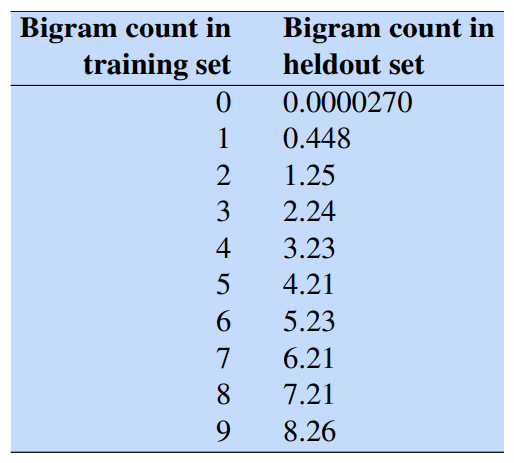

Definase la Probabilidad de Kneser-Ney

$$P_{KN}(w_{n}|w_{n-1}) = \frac{max(C(w_{n-1}w_{n})-d,0)}{C(w_{n-1})}+ \lambda(w_{n-1})P_{CONTINUATION}(w_{n})$$

Donde 

$$\lambda(w_{n-1}) = \frac{d}{\sum_{w}C(w_{n-1}w)}|{w: C(w_{n-1}w)>0}|$$

$$P_{CONTINUATION}(w_{n}) = \frac{|{v: C(vw_{n})>0}|}{\sum_{z}|{v: C(vz) > 0)}|} $$

Definimos una serie de funciones que nos ayudaran a definir $P_{CONTINUATION}$

In [317]:
def counter_more_zero(word1, list_tuples, list_text):
    total_c = 0
    clear_list_text = set(list_text)
    for word in clear_list_text:
        if bigram_counter(word, word1, tuple_list) > 0:
            total_c += list_text.count(word)    
    return total_c

In [318]:
def p_continuation(word1, list_tuples, list_text):
    dem = 0
    num = 0
    clear_list_text = set(list_text)
    for j in clear_list_text:
        dem += counter_more_zero(j, list_tuples, list_text)*list_text.count(j)  
    num = counter_more_zero(word1, list_tuples, list_text)
    return num/dem

Definimos una serie de funciones que nos ayudaran a definir $\lambda(w_{n-1})$

In [323]:
def counter_more_zero_1(word1, list_tuples, list_text):
    total_c = 0
    clear_list_text = set(list_text)
    for word in clear_list_text:
        if bigram_counter(word1, word, tuple_list) > 0:
            total_c += list_text.count(word)    
    return total_c

In [325]:
def lambda_f(word, d, list_tuples, list_text):
    den = 0
    clear_list_text = set(list_text)
    for j in clear_list_text:
        den += bigram_counter(word, j, list_tuples)
    value = d*counter_more_zero_1(word, list_tuples, list_text)/den
    return value

Definimos el sumando relacionado a $\frac{max(C(w_{n-1}w_{n})-d,0)}{C(w_{n-1})}$

In [327]:
def first_part(word2, word1, d, list_tuples, list_text):
    v1 = bigram_counter(word1, word2, tuple_list) 
    v2 = unigram_counter(word2, list_text)
    v3 = max(v1-d, 0)
    value = v3/v2
    return value

<h5>Definase la probabilidad de Kneser-Ney</h5>

In [330]:
def p_kn(word2, word1, d,list_tuples, list_text):
    sec_val = lambda_f(word1, d, list_tuples, list_text)*p_continuation(word2, list_tuples, list_text)
    if word2 not in list_text:
        return sec_val
    first_val = first_part(word2, word1, d, list_tuples, list_text)
    return first_val+sec_val

Calculemos la $P_{KN}(am|i)$

In [332]:
ds = p_kn('am','i',0.75,tuple_list, list_text)
ds

0.643595041322314

<h2>Ejemplo aplicado</h2>

Para el siguiente ejemplo usaremos las primeras 80 filas del archivo 'coffeee.csv' presente en Canvas del curso de PLN, en base a este corpus calcularemos diversas probabilidades asociadas a la ocurrencia de bigramas.

Recordemos que al ser un planteamiento de funciones de probabilidad, se vuelve dificil adaptar este problema a casos de decisión binarios (que son propios de regresiones log. o bayesianos ingenuos), es por eso que calcularemos distintas probabilidades para ver la performance de las funciones.

In [339]:
import pandas as pd

df = pd.read_csv('coffee.csv', sep=',')

In [340]:
df

,reviews
0,I wanted to love this. I was even prepared for...
1,Grove Square Cappuccino Cups were excellent. T...
2,I bought the Grove Square hazelnut cappuccino ...
3,"I love my Keurig, and I love most of the Keuri..."
4,It's a powdered drink. No filter in k-cup.<br ...
...,...
74,"I love this product, the taste is so rich and ..."
75,"The flavor is rich, sweet and you do not need ..."
76,I love this coffee. So far have only had the ...
77,If you like flavored coffee these are a real t...


In [341]:
elements = df['reviews'].to_list()
elements = ' '.join(elements)
elements = elements.lower()

In [342]:
import re
elements = re.sub(r'\s+', ' ',elements )
elements = re.sub(r'\w+\d+\w+', ' ',elements )
elements = re.sub(r'\d+', ' ',elements )

In [343]:
elements = re.sub(r'\W+', ' ',elements )

In [344]:
elements

'i wanted to love this i was even prepared for it to be somewhat like a cheap circle k cappuccino unfortunately the product itself is really greasy you actually see grease in the cup it is calories per serving and the taste it really really powder tasting like powdered milk i wasn t expecting a starbucks cap out of the k cup but i was expecting a little more than this br br i read the reviews and they were sort of mixed so i chose to try it but i won t buy these again they will sit on the top cupboard shelf till i am desperate i guess or throw them away three boxes of them eesssh br br i also now realize these aren t eligible for return so that sucks oh well buyer beware right grove square cappuccino cups were excellent tasted really good right from the keurig brewer with nothing added wwould highly recommend rccjr i bought the grove square hazelnut cappuccino k cups not expecting too much what a pleasant surprise when i tasted that cup of coffee it surprised even me a harsh critic of 

In [350]:
tuple_list ,list_text = tuple_creator(elements)

Calcularemos la $P(am|i)$ usando las cuatro funciones de probabilidad definidas anteriormente:

In [365]:
d0 = p_kn('am','i',0.75,tuple_list, list_text)
d0

0.7251748260265254

In [373]:
d1 = probabilidad('am','i',tuple_list, list_text)
d1

0.8

In [371]:
d2 = laplace_prob('am','i',tuple_list, list_text)
d2

0.00209

In [372]:
d3 = laplace_prob_k('am','i',tuple_list, list_text, 10)
d3

0.00042

Probabilidad de la secuencia $I am$ en el corpus asociado a coffee.csv
<table>
  <tr>
    <th>Probabilidad/word</th>
    <th>am</th>
  </tr>
  <tr>
    <td>Kneser-Ney</td>
    <td>0.7251</td>
  </tr>
  <tr>
    <td>Laplace</td>
    <td>0.00209</td>
  </tr>
  <tr>
    <td>Laplace-K</td>
    <td>0.00042</td>
  </tr>
  <tr>
    <td>Probabilidad I</td>
    <td>0.8</td>
  </tr>
</table>


En este ejemplo vemos claramente una de las desventajas del suavizado laplaciano, dado que al ser un metodo que normaliza por la cantidad de words en el corpus se ve que termina subponderando bigramas que en realidad son sumamente comunes.

<h4>Veamos otro ejemplo</h4>

In [382]:
d00 = p_kn('cappaccino','a',0.75,tuple_list, list_text)
d00

0.08384439422971547

In [383]:
d10 = probabilidad('cappaccino','a',tuple_list, list_text)
d10

0.33333

In [384]:
d20 = laplace_prob('cappaccino','a',tuple_list, list_text)
d20

0.00047

In [385]:
d30 = laplace_prob_k('cappaccino','a',tuple_list, list_text, 10)
d30

0.00026

Probabilidad de la secuencia $a \hspace{0.1cm} cappaccino$ en el corpus asociado a coffee.csv
<table>
  <tr>
    <th>Probabilidad/word</th>
    <th>am</th>
  </tr>
  <tr>
    <td>Kneser-Ney</td>
    <td>0.08384</td>
  </tr>
  <tr>
    <td>Laplace</td>
    <td>0.33333</td>
  </tr>
  <tr>
    <td>Laplace-K</td>
    <td>0.00047</td>
  </tr>
  <tr>
    <td>Probabilidad I</td>
    <td>0.00026</td>
  </tr>
</table>


Acá se ve la ventaja del metodo KN, dado que no se dedica únicamente a calcular de forma "purista" la frecuencia dividido en el total de casos, sino que los factores $\lambda(w_{n-1})$ y $P_{CONTINUATION}(w_{n}) $ son buenos ponderadores que calculan frecuencias asociadas a las palabras tanto de forma antecedente como consecuente.